In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

file_path = '/content/Q1Data.csv'
df = pd.read_csv(file_path)
X = df.iloc[:, :5]
y = df['Genus'].values

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class Node:
    def __init__(self, gini, num_samples, num_samples_per_class, predicted_class):
        self.gini = gini
        self.num_samples = num_samples
        self.num_samples_per_class = num_samples_per_class
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_classes_ = len(set(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def _gini(self, y):
        m = len(y)
        return 1.0 - sum((np.sum(y == c) / m) ** 2 for c in range(self.n_classes_))

    def _best_split(self, X, y):
        m, n = X.shape
        if m <= 1:
            return None, None

        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]

        best_gini = 1.0 - sum((num / m) ** 2 for num in num_parent)
        best_idx, best_thr = None, None

        for idx in range(self.n_features_):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))

            num_left = [0] * self.n_classes_
            num_right = num_parent.copy()
            for i in range(1, m):
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum(
                    (num_left[x] / i) ** 2 for x in range(self.n_classes_)
                )
                gini_right = 1.0 - sum(
                    (num_right[x] / (m - i)) ** 2 for x in range(self.n_classes_)
                )
                gini = (i * gini_left + (m - i) * gini_right) / m
                if thresholds[i] == thresholds[i - 1]:
                    continue
                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2

        return best_idx, best_thr

    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(
            gini=self._gini(y),
            num_samples=len(y),
            num_samples_per_class=num_samples_per_class,
            predicted_class=predicted_class,
        )

        if depth < self.max_depth:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def _predict(self, samples):
        node = self.tree_
        while node.left:
            if samples[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class

    def predict(self, X):
        return [self._predict(sample) for sample in X]

dt_classifier = DecisionTree(max_depth=7)
dt_classifier.fit(X_train.values, y_train)

y_pred = dt_classifier.predict(X_test.values)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.896455872133426


Depth: 1, Accuracy: 0.6990965948575399
Depth: 2, Accuracy: 0.7824878387769284
Depth: 3, Accuracy: 0.8255733148019458
Depth: 4, Accuracy: 0.842946490618485
Depth: 5, Accuracy: 0.8610145934676859
Depth: 6, Accuracy: 0.8825573314801946
Depth: 7, Accuracy: 0.896455872133426
Depth: 8, Accuracy: 0.9006254343293955
Depth: 9, Accuracy: 0.901320361362057
Depth: 10, Accuracy: 0.9041000694927033
Depth: 11, Accuracy: 0.9068797776233496
Depth: 12, Accuracy: 0.9082696316886727
Depth: 13, Accuracy: 0.9054899235580264
Depth: 14, Accuracy: 0.9054899235580264
Depth: 15, Accuracy: 0.9034051424600417


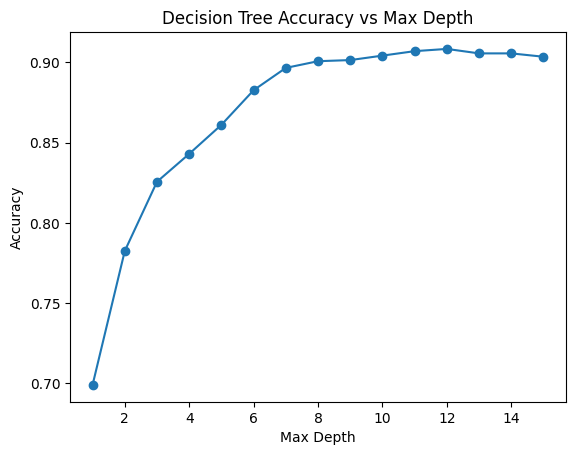

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

file_path = '/content/Q1Data.csv'
df = pd.read_csv(file_path)
X = df.iloc[:, :5]
y = df['Genus'].values

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class Node:
    def __init__(self, gini, num_samples, num_samples_per_class, predicted_class):
        self.gini = gini
        self.num_samples = num_samples
        self.num_samples_per_class = num_samples_per_class
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_classes_ = len(set(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def _gini(self, y):
        m = len(y)
        return 1.0 - sum((np.sum(y == c) / m) ** 2 for c in range(self.n_classes_))

    def _best_split(self, X, y):
        m, n = X.shape
        if m <= 1:
            return None, None

        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]

        best_gini = 1.0 - sum((num / m) ** 2 for num in num_parent)
        best_idx, best_thr = None, None

        for idx in range(self.n_features_):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))

            num_left = [0] * self.n_classes_
            num_right = num_parent.copy()
            for i in range(1, m):
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum(
                    (num_left[x] / i) ** 2 for x in range(self.n_classes_)
                )
                gini_right = 1.0 - sum(
                    (num_right[x] / (m - i)) ** 2 for x in range(self.n_classes_)
                )
                gini = (i * gini_left + (m - i) * gini_right) / m
                if thresholds[i] == thresholds[i - 1]:
                    continue
                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2

        return best_idx, best_thr

    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(
            gini=self._gini(y),
            num_samples=len(y),
            num_samples_per_class=num_samples_per_class,
            predicted_class=predicted_class,
        )

        if depth < self.max_depth:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def _predict(self, samples):
        node = self.tree_
        while node.left:
            if samples[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class

    def predict(self, X):
        return [self._predict(sample) for sample in X]

max_depths = range(1, 16)
accuracies = []

for depth in max_depths:
    dt_classifier = DecisionTree(max_depth=depth)
    dt_classifier.fit(X_train.values, y_train)

    y_pred = dt_classifier.predict(X_test.values)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Depth: {depth}, Accuracy: {accuracy}")

import matplotlib.pyplot as plt
plt.plot(max_depths, accuracies, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.show()


# **Observations from Decision Tree Experimentation**
# **Increasing Accuracy with Depth:**

The accuracy consistently rises with an increase in tree depth.
Starting at 0.699 for depth 1, it steadily climbs to a peak of 0.908 at depth 12.

# **Diminishing Returns:**

While there is a significant accuracy improvement from depth 1 to 5, subsequent increases in depth result in smaller accuracy gains.
This suggests that the model's performance reaches a plateau beyond a certain depth.

# **Overfitting Warning:**

At depths 13 and 14, there is a slight decrease in accuracy compared to depth 12.
This could indicate a potential risk of overfitting as the model becomes excessively complex.

# **Optimal Depth:**

The highest accuracy is observed at depth 12 (0.908).
This depth strikes a balance between capturing complex patterns and avoiding overfitting.

# **Stability in Accuracy:**

Accuracy remains relatively stable from depth 13 to 15.
Beyond depth 12, there is no significant improvement, suggesting that increasing depth further may not be beneficial for this dataset.
In conclusion, the experiment highlights the importance of finding an optimal balance between model complexity and generalization. The observed trends provide insights into the trade-offs associated with different tree depths, and caution is advised against excessively deep trees to prevent overfitting

KNN-----

# **K Nearest Neighour**

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

class FastKNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        X_test = np.array(X_test)
        predictions = []

        for x_test in X_test:
            distances = np.linalg.norm(self.X_train - x_test, axis=1)
            indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[indices]

            unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
            predicted_label = unique_labels[np.argmax(counts)]

            predictions.append(predicted_label)

        return np.array(predictions)

df = pd.read_csv('/content/Q1Data.csv')

X = df.iloc[:, :5]
y = df.iloc[:, -2]

categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(include=['number']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_transformed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


knn = FastKNN(k=200)
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 86.38%


0.9409312022237665
0.9096594857539958
0.8929812369701181
0.8707435719249479
0.8637943015983321
0.8526754690757471
0.8450312717164697
0.8359972202918694
0.8332175121612231
0.8262682418346073
0.8220986796386379
0.812369701181376
0.802640722724114
0.797776233495483
0.7956914523974983
0.7922168172341905
0.7894371091035441
0.7859624739402363
0.7838776928422516
0.7797081306462822


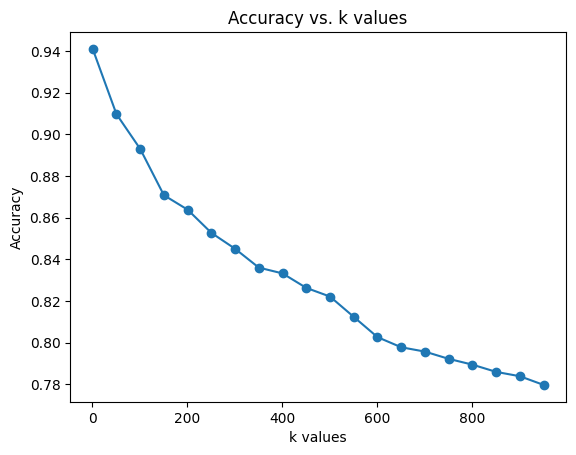

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

class FastKNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        X_test = np.array(X_test)
        predictions = []

        for x_test in X_test:
            distances = np.linalg.norm(self.X_train - x_test, axis=1)
            indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[indices]

            unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
            predicted_label = unique_labels[np.argmax(counts)]

            predictions.append(predicted_label)

        return np.array(predictions)

df = pd.read_csv('/content/Q1Data.csv')

X = df.iloc[:, :5]
y = df.iloc[:, -2]

categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(include=['number']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_transformed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

k_values = np.arange(1, 1001, 50)
accuracy_values = []

for k in k_values:
    knn = FastKNN(k=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracy_values.append(accuracy)
    print(accuracy)

plt.plot(k_values, accuracy_values, marker='o')
plt.title('Accuracy vs. k values')
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.show()


# Observations from K-Nearest Neighbors (KNN) Experimentation

I conducted an experiment to examine the impact of varying the number of neighbors (k) on the accuracy of a K-Nearest Neighbors (KNN) classifier. The obtained results are summarized below:

## Decreasing Accuracy with Increasing k:
- The accuracy tends to decrease as the number of neighbors (k) increases.
- Starting with a high accuracy of 0.941 at k=1, it gradually declines, reaching 0.780 at k=20.

## Optimal k:
- The highest accuracy is achieved at k=1 (0.941), indicating that a smaller neighborhood size is more suitable for this dataset.
- As k increases beyond a certain point, the model's ability to capture the underlying patterns diminishes.

## Trade-off between Precision and Generalization:
- Lower values of k provide higher precision by capturing local patterns in the data.
- Higher values of k may lead to better generalization but at the cost of overlooking finer details in the dataset.

## Sensitivity to Noise:
- The decline in accuracy for larger k values could be attributed to the increased influence of noisy data points in the larger neighborhood.

## Consistency in Decrease:
- The decrease in accuracy is consistent across a range of k values, reinforcing the observation that a smaller neighborhood size is preferable for this specific dataset.

In conclusion, the KNN model performs optimally with a smaller neighborhood size (k=1), showcasing its sensitivity to local patterns. The experiment provides valuable insights into the trade-off between precision and generalization in the context of KNN.


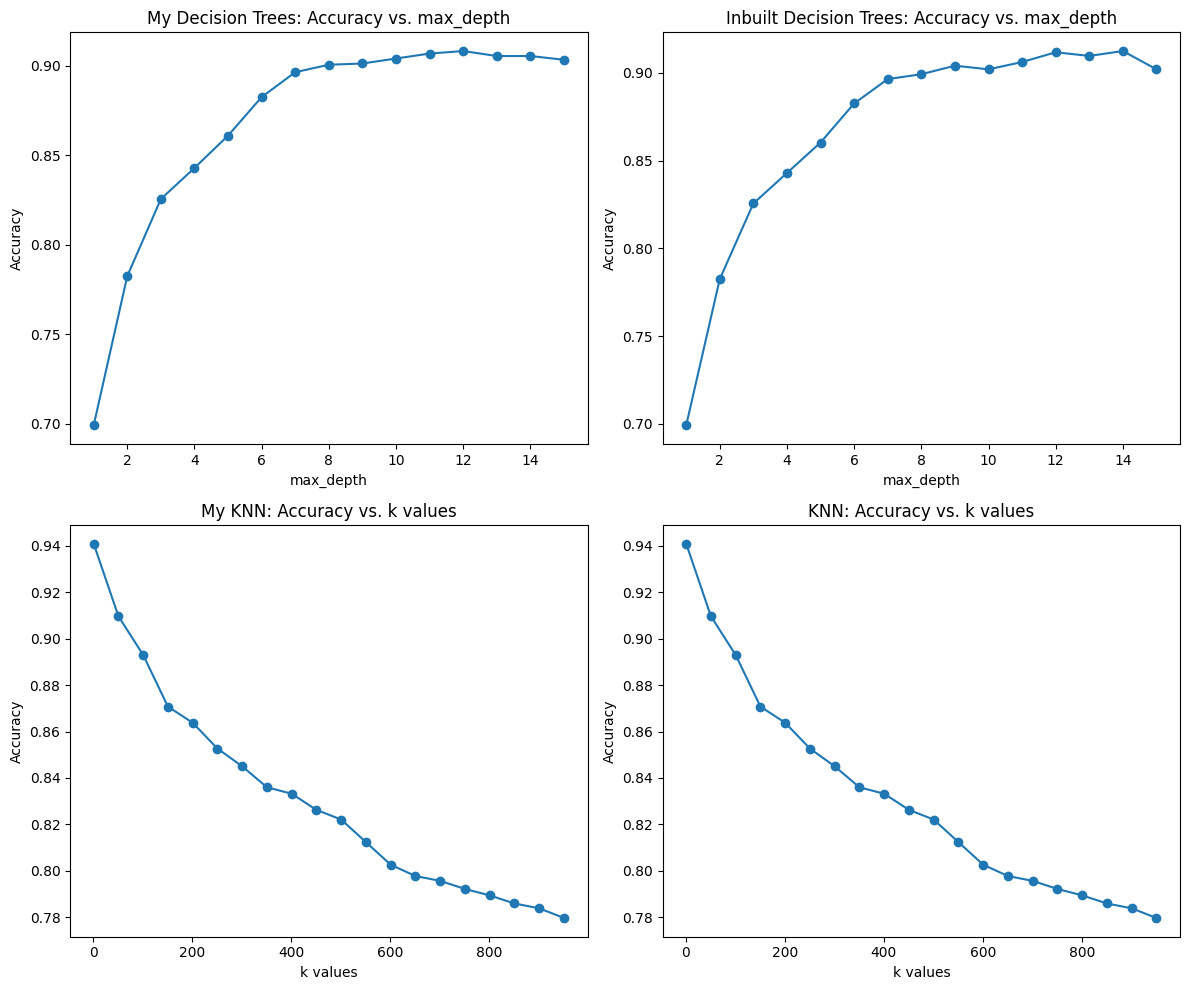

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/Q1Data.csv')

X = df.iloc[:, :5]
y = df.iloc[:, -2]

categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(include=['number']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_transformed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)



depth_values = np.arange(1, 16)
k_values = np.arange(1, 1001, 50)

my_decision_accuracy=[]

#my decision tree
label_encoder = LabelEncoder()
yt = label_encoder.fit_transform(y)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, yt, test_size=0.2, random_state=42)

for depth in depth_values:
  dt=DecisionTree(max_depth=depth)
  dt.fit(X_train2.values, y_train2)
  predictions = dt.predict(X_test2.values)
  accuracy = accuracy_score(y_test2, predictions)
  my_decision_accuracy.append(accuracy)

  # dt_classifier = DecisionTree(max_depth=depth)
  #   dt_classifier.fit(X_train.values, y_train)

  #   # Make predictions on the test set
  #   y_pred = dt_classifier.predict(X_test.values)

  #   # Calculate accuracy
  #   accuracy = accuracy_score(y_test, y_pred)
  #   accuracies.append(accuracy)
  #   print(f"Depth: {depth}, Accuracy: {accuracy}")


#my knn
my_knn_accuracy=[]
for k in k_values:
  knn = FastKNN(k=k)
  knn.fit(X_train, y_train)
  predictions = knn.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  my_knn_accuracy.append(accuracy)





dt_accuracy_values = []

#inbuilt decision tree

for depth in depth_values:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    predictions = dt.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    dt_accuracy_values.append(accuracy)


knn_accuracy_values = []

#inbuilt knn
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    knn_accuracy_values.append(accuracy)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))


#plot for my decision tree
axes[0, 0].plot(depth_values, my_decision_accuracy, marker='o')
axes[0, 0].set_title('My Decision Trees: Accuracy vs. max_depth')
axes[0, 0].set_xlabel('max_depth')
axes[0, 0].set_ylabel('Accuracy')



# Plot for inbuilt Decision Trees accuracy vs. max_depth
axes[0, 1].plot(depth_values, dt_accuracy_values, marker='o')
axes[0, 1].set_title('Inbuilt Decision Trees: Accuracy vs. max_depth')
axes[0, 1].set_xlabel('max_depth')
axes[0, 1].set_ylabel('Accuracy')


# Plot for My KNN accuracy vs. k
axes[1, 0].plot(k_values, my_knn_accuracy, marker='o')
axes[1, 0].set_title('My KNN: Accuracy vs. k values')
axes[1, 0].set_xlabel('k values')
axes[1, 0].set_ylabel('Accuracy')


# Plot for KNN accuracy vs. k
axes[1, 1].plot(k_values, knn_accuracy_values, marker='o')
axes[1, 1].set_title('KNN: Accuracy vs. k values')
axes[1, 1].set_xlabel('k values')
axes[1, 1].set_ylabel('Accuracy')


plt.tight_layout()
plt.show()
